## Data 601 Project:

Name of the dataset: Sachin Tendulkar Dataset

Data Source Location:

https://data.world/ram-baskaran/sachin-tendulkar-test-data

In the above link Test.xlsx is the data which I am using for the project.

Description of how data source was found:

I have interest in cricket, when I searched for the available datasets for which they don’t have any existing python analysis. I have found the above data.

Cost incurred to download the dataset:  Zero, the dataset is free to download.

Legality of the data set: The data set is from a free source and can be accessible by everyone and the data is legal to use.

Documented Exploratory Data Analysis:

I have searched a lot on google but did not find any previously documented EDA on the dataset.

Data types in the dataset:

Numeric: float, Int,
Categorical,

Datetime

Project proposal relevant to 601 objectives:

The project that I have selected is relevant to the objective of data601

Description (Stories in the Data):

This dataset contains stats of Sachin Tendulkar Test Matches (Collected from ESPN Website). I can show Sachin’s performance against different countries i.e., win loss ratio, runs scored etc.

Data size:

The dataset is of the size of 60.5kb

The dataset contains two tables of data

First dataset which is a batting data contains 14 rows 348 columns and the second dataset which is a fielding data has 14 rows 369

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

### The comment chdir() is used to change the current working directory. The comment getcwd()is used for getting the current working directory

In [5]:
os.chdir("C:\\Users\\rakes\\OneDrive\\Desktop\\601 Assignments\\project_mid")#changing the current working directory.
os.getcwd() #returns current working directory of a process.

'C:\\Users\\rakes\\OneDrive\\Desktop\\601 Assignments\\project_mid'

In [8]:
batting=pd.read_csv("Test_1.csv") #reading the particular file

In [9]:
fielding=pd.read_csv("Test_2.csv") #reading the particular file

In [10]:
#displaying the shape(r,c)
batting.shape

(347, 14)

In [11]:
#displaying the shape(r,c)
fielding.shape

(368, 14)

In [12]:
#Displaying first 5 rows of the dataframe
batting.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Match Number,Result
0,11,92,-,-,0,-,6,lbw,1,v Sri Lanka,Chandigarh,23-Nov-90,Test # 1156,Won
1,50,158,118,6,0,42.37,4,caught,1,v England,Kolkata,29-Jan-93,Test # 1211,Won
2,9,17,19,2,0,47.36,4,not out,4,v England,Kolkata,29-Jan-93,Test # 1211,Won
3,165,361,296,24,1,55.74,4,caught,1,v England,Chennai,11-Feb-93,Test # 1213,Won
4,78,285,213,10,0,36.61,4,lbw,2,v England,Mumbai,19-Feb-93,Test # 1214,Won


# Cleaning Data
### Dropping the duplicates since in the column name match number has repeated values

In [13]:
batting=batting.drop_duplicates(subset='Match Number', keep="last")

In [14]:
batting.shape

(200, 14)

In [15]:
#displaying head of the required data for reference
fielding.head()

,Overs,Mdns,Runs,Wkts,Econ,Pos,Inns,Dismisal Made,Catch Taken,Opposition,Ground,Start DateAscending,Match Number,Result
0,DNB,-,-,-,-,-,2,0,0,v Sri Lanka,Chandigarh,23-Nov-90,Test # 1156,Won
1,DNB,-,-,-,-,-,3,0,0,v Sri Lanka,Chandigarh,23-Nov-90,Test # 1156,Won
2,DNB,-,-,-,-,-,2,0,0,v England,Kolkata,29-Jan-93,Test # 1211,Won
3,DNB,-,-,-,-,-,3,1,1,v England,Kolkata,29-Jan-93,Test # 1211,Won
4,2,1,5,0,2.5,6,2,0,0,v England,Chennai,11-Feb-93,Test # 1213,Won


In [16]:
#dropping the duplicates
fielding=fielding.drop_duplicates(subset='Match Number', keep="last")

#### Merging both the dataframes on Match Number column since batting table and fielding table constitute to Sachin over all statistics 

In [17]:
#merge the batting data and the fielding data
main=pd.merge(batting,fielding, how='outer', left_on=['Match Number'], right_on=['Match Number'])

In [18]:
main.head().T

,0,1,2,3,4
Runs_x,11,9,165,78,62
Mins,92,17,361,285,128
BF,-,19,296,213,114
4s,-,2,24,10,7
6s,0,0,1,0,0
SR,-,47.36,55.74,36.61,54.38
Pos_x,6,4,4,4,4
Dismissal,lbw,not out,caught,lbw,caught
Inns_x,1,4,1,2,1
Opposition_x,v Sri Lanka,v England,v England,v England,v Zimbabwe


In [19]:
main.shape

(200, 27)

In [20]:
#Displaying column names
main.columns

Index(['Runs_x', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos_x', 'Dismissal',
       'Inns_x', 'Opposition_x', 'Ground_x', 'Start DateAscending_x',
       'Match Number', 'Result_x', 'Overs', 'Mdns', 'Runs_y', 'Wkts', 'Econ',
       'Pos_y', 'Inns_y', 'Dismisal Made', 'Catch Taken', 'Opposition_y',
       'Ground_y', 'Start DateAscending_y', 'Result_y'],
      dtype='object')

In [21]:
#dropping the columns which are repeated
main=main.drop(['Result_y','Opposition_y','Ground_y','Start DateAscending_y','Result_y','Dismisal Made'],axis=1)

In [22]:
#renaming the columns 
main.rename({'Runs_x': 'Runs_scored', 'Pos_x': 'position','Inns_x':'Inns','Opposition_x':'Opposition','Ground_x':'Ground','Start DateAscending_x':'Start_DateAscending','Result_x':'Result','Runs_y':'Runs_given','Pos_y':'Position_of_bowling','Inns_y':'Inninigs','Catch Taken':'Catch_Taken'}, axis=1, inplace=True)

In [23]:
main.columns

Index(['Runs_scored', 'Mins', 'BF', '4s', '6s', 'SR', 'position', 'Dismissal',
       'Inns', 'Opposition', 'Ground', 'Start_DateAscending', 'Match Number',
       'Result', 'Overs', 'Mdns', 'Runs_given', 'Wkts', 'Econ',
       'Position_of_bowling', 'Inninigs', 'Catch_Taken'],
      dtype='object')

In [24]:
main.dtypes

Runs_scored            object
Mins                   object
BF                     object
4s                     object
6s                     object
SR                     object
position               object
Dismissal              object
Inns                   object
Opposition             object
Ground                 object
Start_DateAscending    object
Match Number           object
Result                 object
Overs                  object
Mdns                   object
Runs_given             object
Wkts                   object
Econ                   object
Position_of_bowling    object
Inninigs               object
Catch_Taken            object
dtype: object

In [25]:
main.shape

(200, 22)

In [26]:
main.head().T

,0,1,2,3,4
Runs_scored,11,9,165,78,62
Mins,92,17,361,285,128
BF,-,19,296,213,114
4s,-,2,24,10,7
6s,0,0,1,0,0
SR,-,47.36,55.74,36.61,54.38
position,6,4,4,4,4
Dismissal,lbw,not out,caught,lbw,caught
Inns,1,4,1,2,1
Opposition,v Sri Lanka,v England,v England,v England,v Zimbabwe


In [27]:
#checking for missisng values
main.isnull().sum()

Runs_scored            0
Mins                   0
BF                     0
4s                     0
6s                     0
SR                     0
position               0
Dismissal              0
Inns                   0
Opposition             0
Ground                 0
Start_DateAscending    0
Match Number           0
Result                 0
Overs                  0
Mdns                   0
Runs_given             0
Wkts                   0
Econ                   0
Position_of_bowling    0
Inninigs               0
Catch_Taken            0
dtype: int64

In [28]:
#Counting the type of dismissal
main.Dismissal.value_counts()

caught     83
lbw        34
not out    30
bowled     26
-          18
run out     8
stumped     1
Name: Dismissal, dtype: int64

Here, '-' is denotes the number of matches Sachin did not bat

### Sachin Dismissal type in every match

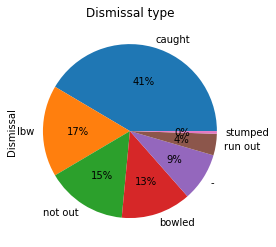

In [29]:
main.Dismissal.value_counts().plot.pie(autopct='%1.0f%%',title='Dismissal type')
plt.show()

'Caught' is the most common dismissal type 

### Match Result type 

In [30]:
main.Result.value_counts()

Won      72
Drawn    72
Loss     56
Name: Result, dtype: int64

C:\Users\rakes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


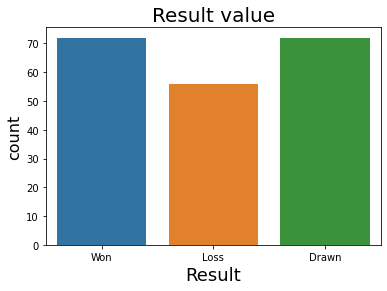

In [31]:
sns.countplot(main['Result'])
plt.title('Result value', fontsize=20)
plt.xlabel('Result', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()

From the graph, we can conclude that the number of 'won' and 'drawn' matches are same.

### Matches played aganist particular Opposition

In [32]:
main.Opposition.value_counts()

v Australia       39
v England         32
v Sri Lanka       25
v South Africa    25
v New Zealand     24
v West Indies     21
v Pakistan        18
v Zimbabwe         9
v Bangladesh       7
Name: Opposition, dtype: int64

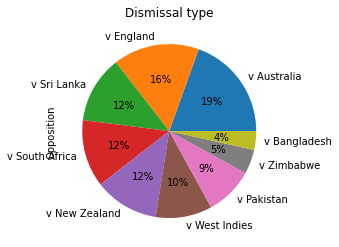

In [33]:
main.Opposition.value_counts().plot.pie(autopct='%1.0f%%',title='Dismissal type')
plt.show()

Sachin played maximum number of matched aganist Australia.

### Team Performance aganist other teams

In [34]:
main.groupby('Opposition')['Result'].value_counts()

Opposition      Result
v Australia     Loss      17
                Won       16
                Drawn      6
v Bangladesh    Won        6
                Drawn      1
v England       Drawn     13
                Loss      10
                Won        9
v New Zealand   Drawn     14
                Won        6
                Loss       4
v Pakistan      Drawn      8
                Loss       5
                Won        5
v South Africa  Loss      11
                Drawn      8
                Won        6
v Sri Lanka     Drawn     11
                Won       11
                Loss       3
v West Indies   Drawn      9
                Won        8
                Loss       4
v Zimbabwe      Won        5
                Drawn      2
                Loss       2
Name: Result, dtype: int64

C:\Users\rakes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


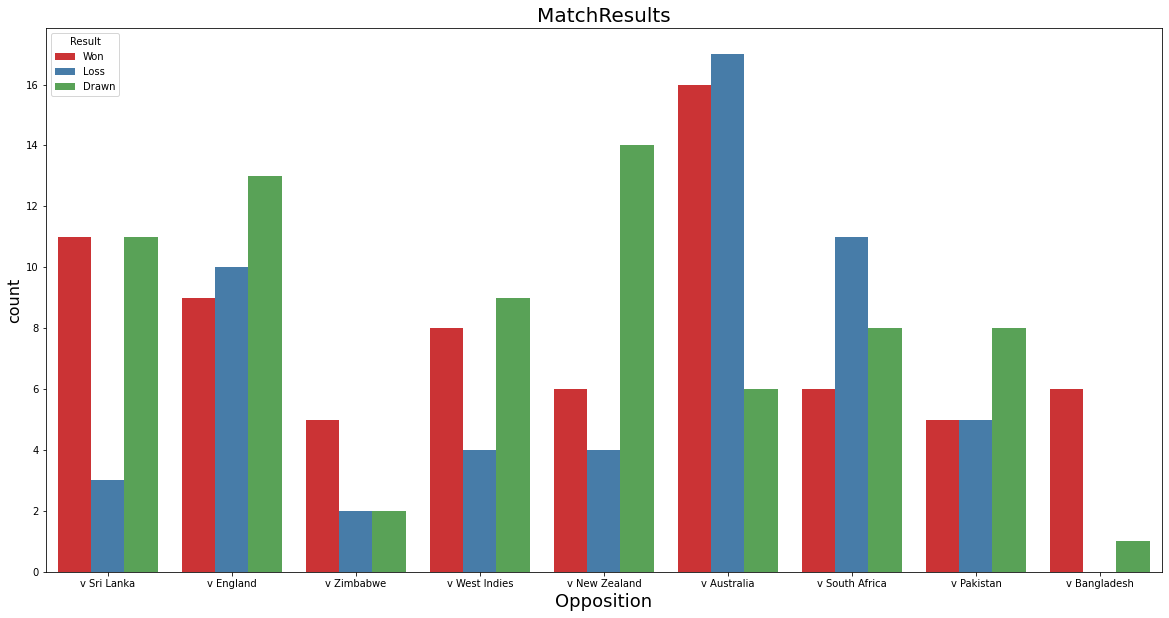

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(main['Opposition'],hue=main['Result'],palette='Set1')
plt.title('MatchResults', fontsize=20)
plt.xlabel('Opposition',fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()

### Extracting month from datetime to plot the monthly average of Sachin 

In [36]:
# import datetime class from datetime module
from datetime import datetime

# get current date
datetime_object = datetime.now()
print(datetime_object)
print('Type :- ',type(datetime_object))

2021-03-07 22:38:36.063044
Type :-  <class 'datetime.datetime'>


In [37]:
list=[]
for i in range(len(main)):
    list.append(main['Start_DateAscending'].iloc[i].split('-')[1])

In [38]:
main['month']=list

In [39]:
main_1=main[main['Runs_scored']!='DNB']

In [40]:
main_1=main_1[main_1['Runs_scored']!='TDNB']

In [41]:
main_1.shape

(182, 23)

In [42]:
main_1['Runs_scored']=main_1['Runs_scored'].astype('int')

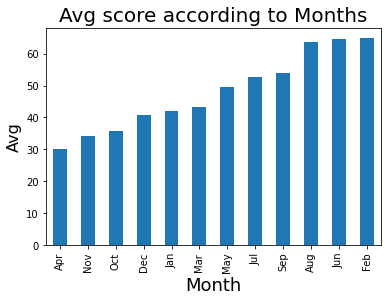

In [43]:
main_1['Runs_scored'].groupby(main_1['month']).mean().sort_values().plot(kind='bar')
plt.title('Avg score according to Months', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Avg', fontsize=16)
plt.show()

In the month of April, his batting average was very low while February was his highest.

## What I learnt

~Merging of dataframes<br>
~Grouping and plotting the data<br>
~Extracting month from date-time format<br>
~Seaborn usage for plotting<br>